**Practice Makes a man Perfect**

In [172]:
# Run this cell first to import libraries and load the dataset.
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.missing import interpolate_2d_inplace
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


# Load the dataset
df = pd.read_csv("//DATA/Exponential Smoothing and Holt Winters/bitcoin_price.csv")

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3387,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
3388,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
3389,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
3390,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
3391,2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945


In [12]:
# Correct Syntax of Choosing Columns
s = df['Open'].head() #Column
print(s)

# Select multiple columns from the DataFrame
p = df[['Date','Open','High','Low','Volume']].head()
print("Some Columns:")
print(p.head())

0    465.864014
1    456.859985
2    424.102997
3    394.673004
4    408.084991
Name: Open, dtype: float64
Some Columns:
        Date        Open        High         Low    Volume
0 2014-09-17  465.864014  468.174011  452.421997  21056800
1 2014-09-18  456.859985  456.859985  413.104004  34483200
2 2014-09-19  424.102997  427.834991  384.532013  37919700
3 2014-09-20  394.673004  423.295990  389.882996  36863600
4 2014-09-21  408.084991  412.425995  393.181000  26580100


In [51]:
# Sorted Data
# Sort by 'Date' and other columns.
sorted_data = df.sort_values(by=['Date','Low','High'],ascending=True)
sorted_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


**Changing Date Format**

To display the date in `dd-mm-yy` format, you can use the `.dt.strftime()` method. This converts the datetime objects into formatted strings.

In [14]:
# Create a copy to avoid modifying the original DataFrame
df_new_format = df.copy()
df_new_format['Date'] = df_new_format['Date'].dt.strftime('%d-%m-%y')
df_new_format.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,17-09-14,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,18-09-14,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,19-09-14,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,20-09-14,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,21-09-14,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [15]:
# The describe() method in Pandas generates descriptive statistics of DataFrame columns which provides key metrics like mean, standard deviation, percentiles and more. It works with numeric data by default but can also handle categorical data which offers insights like the most frequent value and the number of unique entries. In this article
# Descriptive Statistics for Numerical Columns generated using .describe() Method
#
# count: Total number of non-null entries in each column.
# mean: Average (mean) of the values in the column.
# std: Standard deviation showing how spread out the values are.
# min: Minimum value in the column.
# 25%: The 25th percentile (Q1) which means 25% of the data points are less than this value.
# 50%: Median value (50th percentile) where half the data points are below it.
# 75%: The 75th percentile (Q3) means 75% of the data points are below this value.
# max: Maximum value in the column.
df.head()
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3392,3392.000000,3392.000000,3392.000000,3392.000000,3392.000000,3.392000e+03
mean,2019-05-09 12:00:00,14563.945437,14904.519086,14197.148352,14574.914414,14574.914414,1.654903e+10
min,2014-09-17 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,2017-01-11 18:00:00,910.350998,923.463760,896.557251,915.989243,915.989243,1.554558e+08
50%,2019-05-09 12:00:00,8237.044922,8394.890137,8034.995117,8244.671875,8244.671875,1.146727e+10
75%,2021-09-03 06:00:00,23743.839844,24205.182129,23243.770508,23776.682129,23776.682129,2.686730e+10
max,2023-12-30 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,16182.363674,16570.758411,15746.886508,16184.518031,16184.518031,1.908743e+10


In [56]:
percentiles = [.20, .40, .60, .80]
include = ['object', 'float', 'int']

desc = df.describe(percentiles=percentiles, include=include)

print(desc)

               Open          High           Low         Close     Adj Close  \
count   3392.000000   3392.000000   3392.000000   3392.000000   3392.000000   
mean   14563.945437  14904.519086  14197.148352  14574.914414  14574.914414   
std    16182.363674  16570.758411  15746.886508  16184.518031  16184.518031   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
20%      606.418774    609.313794    604.116394    606.720593    606.720593   
40%     6303.165918   6435.682520   6217.100098   6319.045996   6319.045996   
50%     8237.044922   8394.890137   8034.995117   8244.671875   8244.671875   
60%    10456.734180  10767.691797  10205.719336  10491.991992  10491.991992   
80%    28460.367969  29097.251953  28095.600000  28473.783203  28473.783203   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  3.392000e+03  
mean   1.654903e+10  
std    1.908743e+10  
min    5.914570e+06  
20%    7.995102e+07 

In [11]:
d = df["Volume"].describe()
print(d)



count    3.392000e+03
mean     1.654903e+10
std      1.908743e+10
min      5.914570e+06
25%      1.554558e+08
50%      1.146727e+10
75%      2.686730e+10
max      3.509679e+11
Name: Volume, dtype: float64


In [12]:
# df.columns
# df.iloc[:,:-5]
df[2:9] #It displays all columns with row index 2 to 8.
df.iloc[:-4,:]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3383,2023-12-22,43868.988281,44367.957031,43441.968750,43997.902344,43997.902344,21028503216
3384,2023-12-23,44012.199219,44015.699219,43351.355469,43739.542969,43739.542969,13507796558
3385,2023-12-24,43728.367188,43945.523438,42786.917969,43016.117188,43016.117188,18830554085
3386,2023-12-25,43010.574219,43765.093750,42765.769531,43613.140625,43613.140625,21115795370


In [30]:
df.columns
df.loc['2021-11-9']

Open         6.754973e+04
High         6.853034e+04
Low          6.638206e+04
Close        6.697183e+04
Adj Close    6.697183e+04
Volume       4.235799e+10
Name: 2021-11-09 00:00:00, dtype: float64

In [35]:
df1 = pd.read_csv("//DATA/Introduction to Time Series Forecasting/bitcoin_price.csv", index_col ="Date", parse_dates = True)
df1.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq=None)

In [57]:
# df.resample('ME').mean().plot()
df.resample('ME').mean()['Close'].idxmax()


Timestamp('2021-11-30 00:00:00')

<Axes: xlabel='Date'>

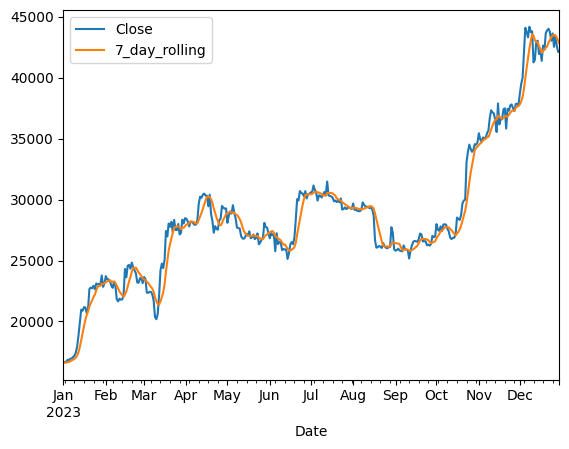

In [56]:
# df.rolling(window=7).max().plot()
df['7_day_rolling'] = df['Close'].rolling(window = 7).mean()
df[['Close','7_day_rolling']].loc['2023'].plot()


In [61]:
#daily returns
df['Daily_returns'] = df['Close'].pct_change()*100
df[abs(df['Daily_returns'])>10].head()

,Open,High,Low,Close,Adj Close,Volume,mean,Date,7_day_rolling,Daily_returns
Date,,,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,365.519579,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,310.171718,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,271.743853,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,255.138994,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,244.638280,244.638280,17.821709


<Axes: title={'center': 'Daily Closing Price'}, xlabel='Date'>

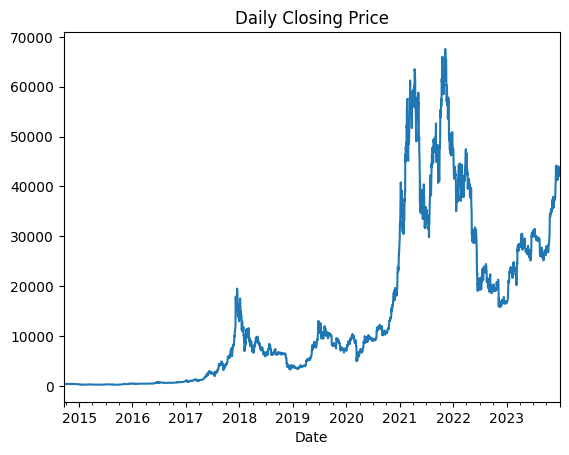

In [64]:
df['Close'].plot(title = 'Daily Closing Price')

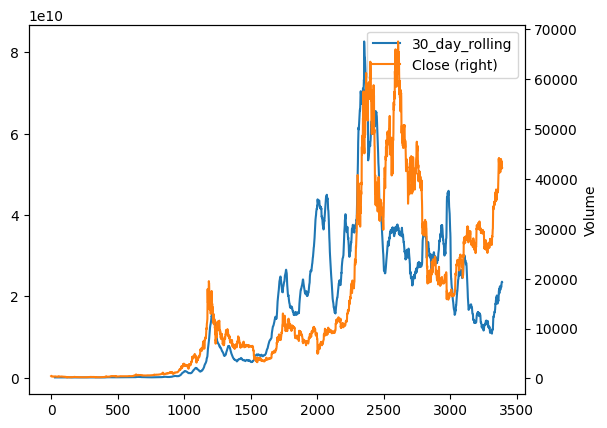

In [79]:
#Plot the yearly
df['30_day_rolling'] = df['Volume'].rolling(window=30).mean()
df['30_day_rolling'].plot(legend=True)
ax = df['Close'].plot(secondary_y=True,legend=True)
ax.set_ylabel('Volume')
plt.show()

In [82]:
df[['Close','30_day_rolling']].corr()

,Close,30_day_rolling
Close,1.000000,0.750445
30_day_rolling,0.750445,1.000000


In [111]:
#identify missing values
df.isnull().sum()

#filling NAN
df['30_day_rolling'].ffill()

df['30_day_rolling'].interpolate(inplace=True)
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
30_day_rolling    0
dtype: int64

In [118]:
df.columns
df.set_index('Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

# Saturday (5) & Sunday (6)
df['is_weekend'] = df.index.weekday > 4

df.head()


,Open,High,Low,Close,Adj Close,Volume,30_day_rolling,year,month,day,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,3.624856e+07,2014,9,17,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,3.624856e+07,2014,9,18,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,3.624856e+07,2014,9,19,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,3.624856e+07,2014,9,20,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,3.624856e+07,2014,9,21,Sunday,6,True


In [160]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose

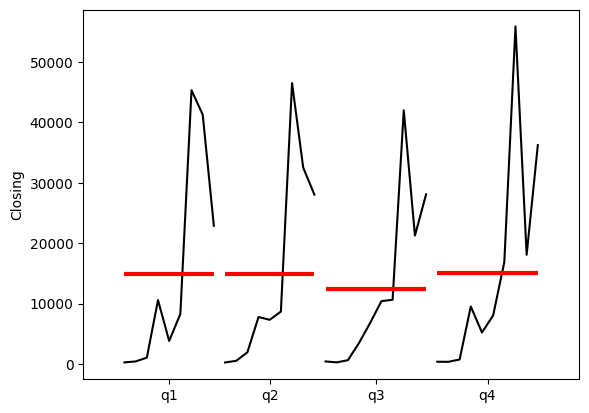

In [127]:
# month_plot(df['Close'].resample('ME').mean(),ylabel='Closing')
quarter_plot(df['Close'].resample('QE').mean(),ylabel='Closing')
plt.show()

In [151]:
df1 = pd.read_csv('//DATA/Introduction to Time Series Forecasting/choco_monthly_revenue.csv', index_col=0, parse_dates=True)
df1.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


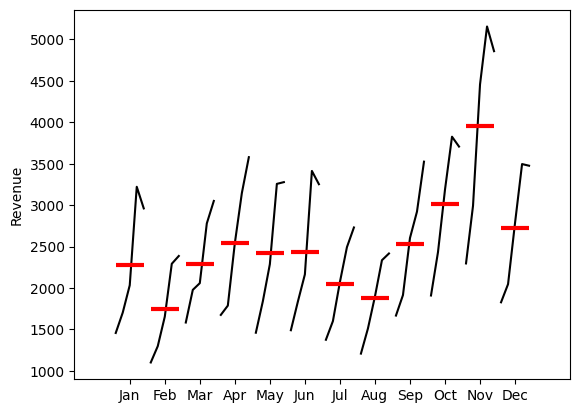

In [155]:
month_plot(df1['revenue'].resample('ME').mean(),ylabel='Revenue')
plt.show()

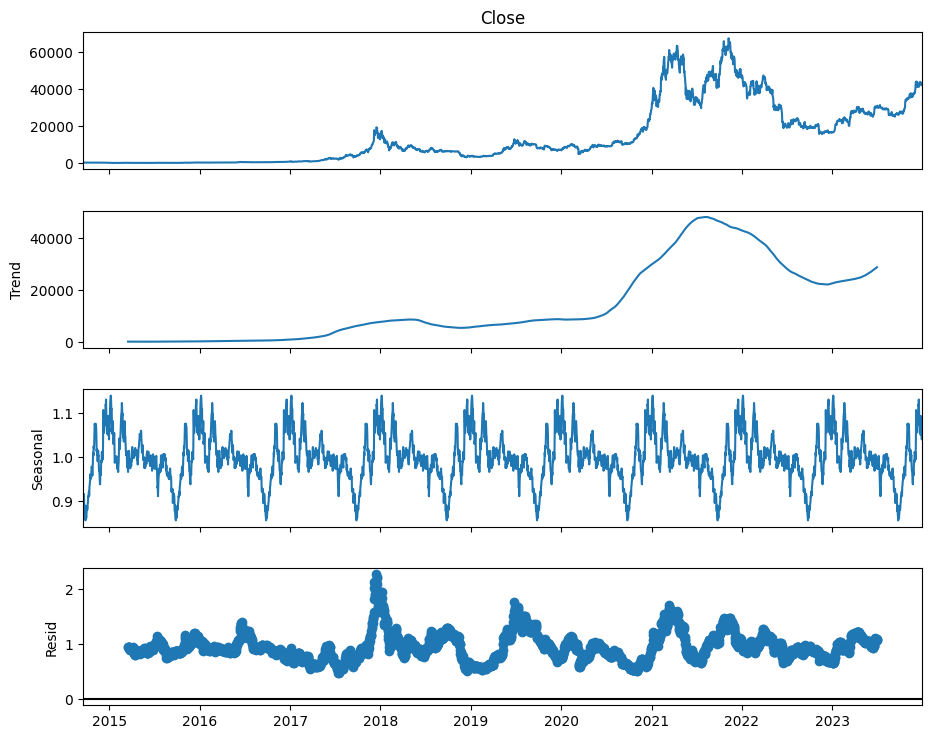

In [168]:
dec = seasonal_decompose(df['Close'],model = 'mul',period = 365)

fig = dec.plot()
fig.set_size_inches(10,8)
plt.show()

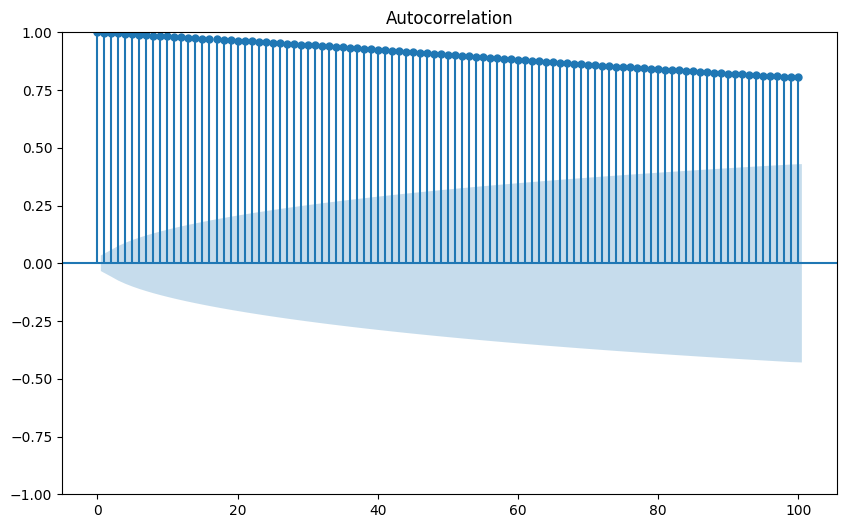

In [171]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['Close'],lags = 100, ax = ax)
plt.show()